Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

1076/1076 [==============================] - 222s 206ms/step - loss: 0.3280 - accuracy: 0.9353 - val_loss: 0.7692 - val_accuracy: 0.8018 - lr: 1.0000e-07
Epoch 2/150
1076/1076 [==============================] - 218s 202ms/step - loss: 0.3192 - accuracy: 0.9372 - val_loss: 0.7625 - val_accuracy: 0.8019 - lr: 1.0000e-07
Epoch 3/150
1076/1076 [==============================] - 217s 201ms/step - loss: 0.3171 - accuracy: 0.9379 - val_loss: 0.7586 - val_accuracy: 0.8026 - lr: 1.0000e-07
Epoch 4/150
1076/1076 [==============================] - 217s 202ms/step - loss: 0.3021 - accuracy: 0.9424 - val_loss: 0.7576 - val_accuracy: 0.8026 - lr: 1.0000e-07
Epoch 5/150
1076/1076 [==============================] - 219s 204ms/step - loss: 0.3014 - accuracy: 0.9411 - val_loss: 0.7539 - val_accuracy: 0.8032 - lr: 1.0000e-07
Epoch 6/150
1076/1076 [==============================] - 219s 203ms/step - loss: 0.3016 - accuracy: 0.9389 - val_loss: 0.7264 - val_accuracy: 0.8109 - lr: 5.0000e-06
Epoch 7/150
1076

1076/1076 [==============================] - 226s 210ms/step - loss: 0.0109 - accuracy: 0.9996 - val_loss: 0.4815 - val_accuracy: 0.8756 - lr: 5.0000e-06
Epoch 100/150
1076/1076 [==============================] - 225s 209ms/step - loss: 0.0113 - accuracy: 0.9994 - val_loss: 0.4885 - val_accuracy: 0.8723 - lr: 5.0000e-06
Epoch 101/150
1076/1076 [==============================] - 226s 210ms/step - loss: 0.0111 - accuracy: 0.9995 - val_loss: 0.4969 - val_accuracy: 0.8723 - lr: 5.0000e-06
Epoch 102/150
1076/1076 [==============================] - 225s 209ms/step - loss: 0.0107 - accuracy: 0.9993 - val_loss: 0.4870 - val_accuracy: 0.8763 - lr: 5.0000e-06
Epoch 103/150
1076/1076 [==============================] - 226s 210ms/step - loss: 0.0100 - accuracy: 0.9997 - val_loss: 0.4833 - val_accuracy: 0.8768 - lr: 5.0000e-06
Epoch 104/150
1076/1076 [==============================] - 225s 209ms/step - loss: 0.0098 - accuracy: 0.9995 - val_loss: 0.4884 - val_accuracy: 0.8738 - lr: 5.0000e-06
Epoch 

Epoch 148/150
1076/1076 [==============================] - 234s 217ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4510 - val_accuracy: 0.8877 - lr: 1.0000e-06
Epoch 149/150
1076/1076 [==============================] - 237s 220ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4481 - val_accuracy: 0.8888 - lr: 1.0000e-06
Epoch 150/150
1076/1076 [==============================] - 234s 217ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.4498 - val_accuracy: 0.8881 - lr: 1.0000e-06


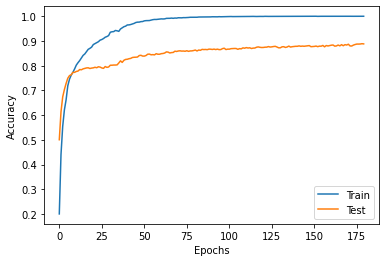

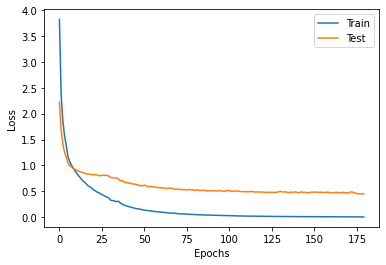

Text(0.5, 492.0, 'Predicted Class')

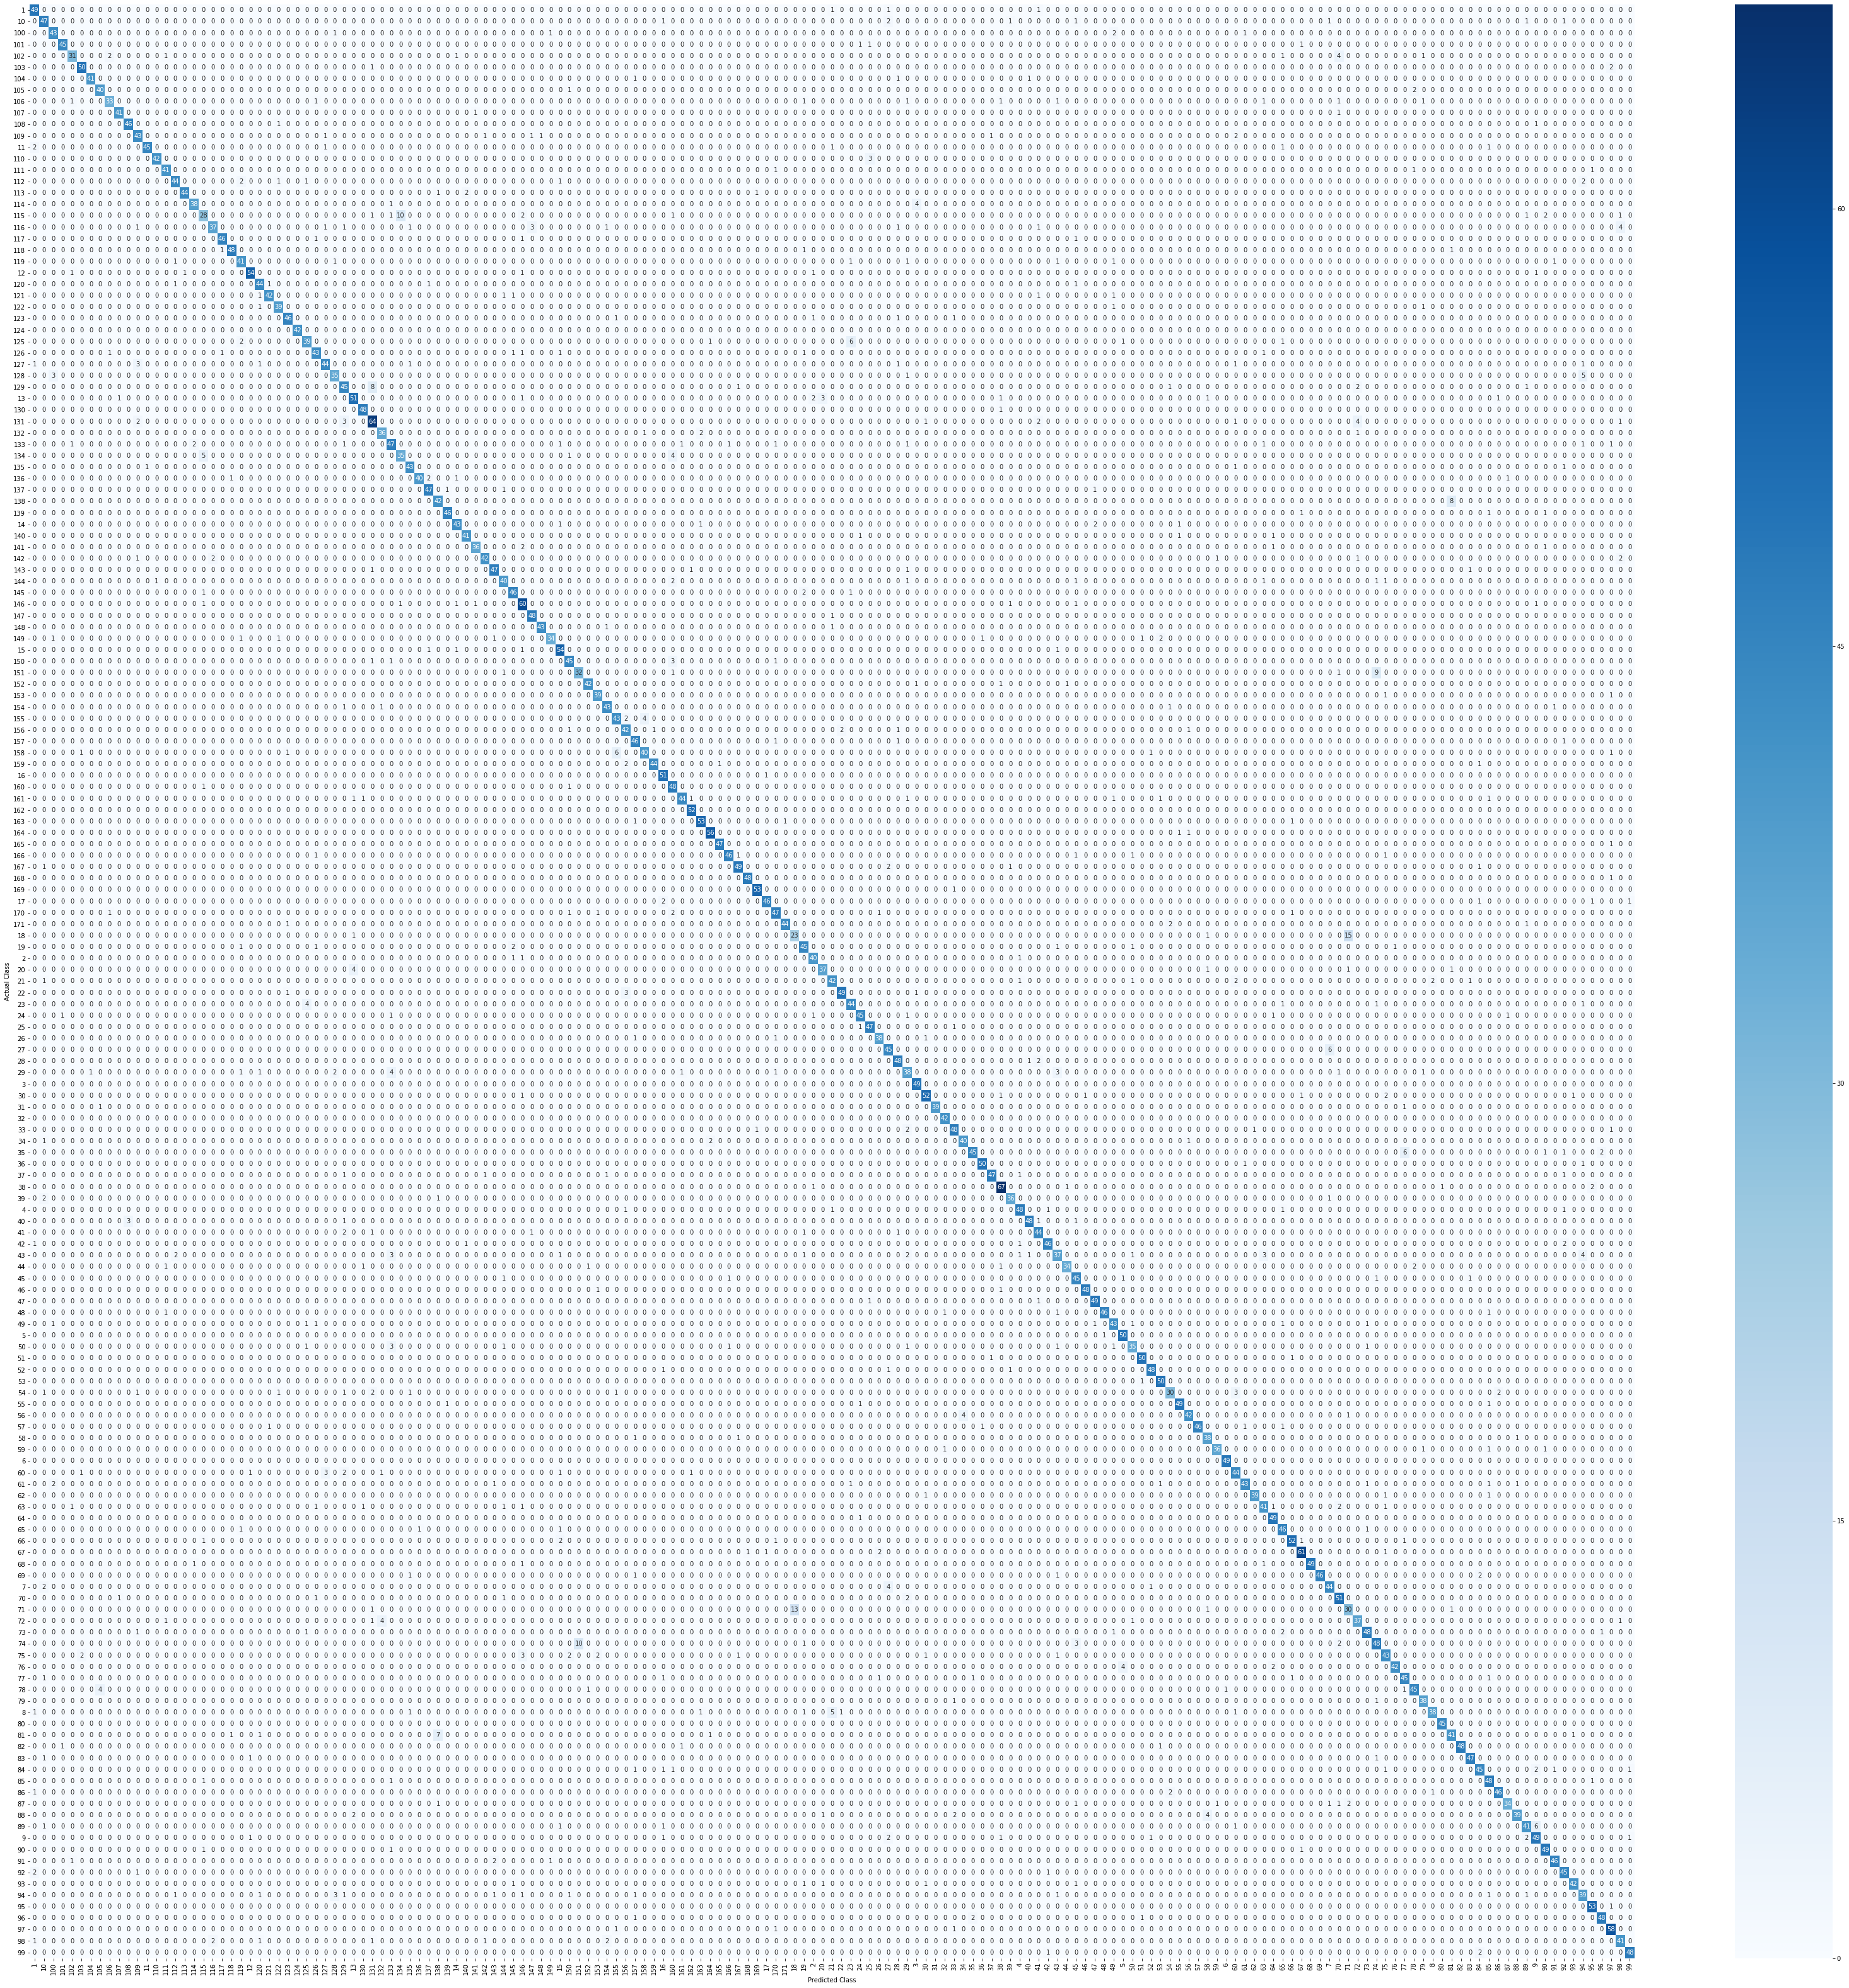

In [1]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 30
epochs2 = 150
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [2]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.891471230516694
recall_score   :  0.8882499429828652
f1_score       :  0.8887782268551959
accuracy_score :  0.8881455399061032

Best accuracy  :  0.8888497948646545


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 434s 403ms/step - loss: 0.0196 - accuracy: 0.9989 - val_loss: 0.4981 - val_accuracy: 0.8688 - lr: 5.0000e-06
Epoch 81/150
1076/1076 [==============================] - 429s 398ms/step - loss: 0.0190 - accuracy: 0.9990 - val_loss: 0.4919 - val_accuracy: 0.8714 - lr: 5.0000e-06
Epoch 82/150
1076/1076 [==============================] - 388s 360ms/step - loss: 0.0182 - accuracy: 0.9990 - val_loss: 0.4835 - val_accuracy: 0.8728 - lr: 5.0000e-06
Epoch 83/150
1076/1076 [==============================] - 234s 218ms/step - loss: 0.0173 - accuracy: 0.9993 - val_loss: 0.4930 - val_accuracy: 0.8724 - lr: 5.0000e-06
Epoch 84/150
1076/1076 [==============================] - 238s 221ms/step - loss: 0.0169 - accuracy: 0.9992 - val_loss: 0.4907 - val_accuracy: 0.8707 - lr: 5.0000e-06
Epoch 85/150
1076/1076 [==============================] - 288s 268ms/step - loss: 0.0163 - accuracy: 0.9993 - val_loss: 0.4884 - val_accuracy: 0.8711 - lr: 5.0000e-06
Epoch 86/15

Epoch 129/150
1076/1076 [==============================] - 432s 401ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.4647 - val_accuracy: 0.8823 - lr: 5.0000e-06
Epoch 130/150
1076/1076 [==============================] - 424s 394ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.4676 - val_accuracy: 0.8793 - lr: 5.0000e-06
Epoch 131/150
1076/1076 [==============================] - 426s 396ms/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.4780 - val_accuracy: 0.8779 - lr: 5.0000e-06
Epoch 132/150
1076/1076 [==============================] - 433s 402ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 0.4674 - val_accuracy: 0.8805 - lr: 5.0000e-06
Epoch 133/150
1076/1076 [==============================] - 425s 395ms/step - loss: 0.0042 - accuracy: 0.9999 - val_loss: 0.4682 - val_accuracy: 0.8825 - lr: 5.0000e-06
Epoch 134/150
1076/1076 [==============================] - 431s 401ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.4730 - val_accuracy: 0.8810 - lr: 5.0

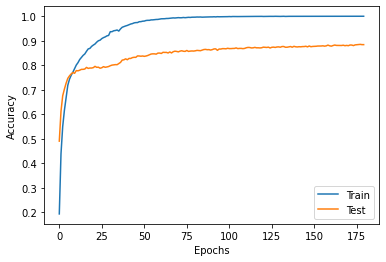

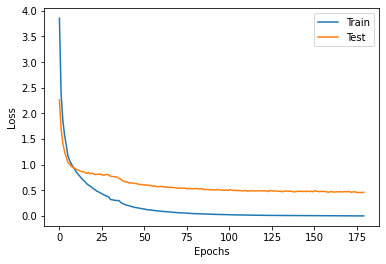

Text(0.5, 492.0, 'Predicted Class')

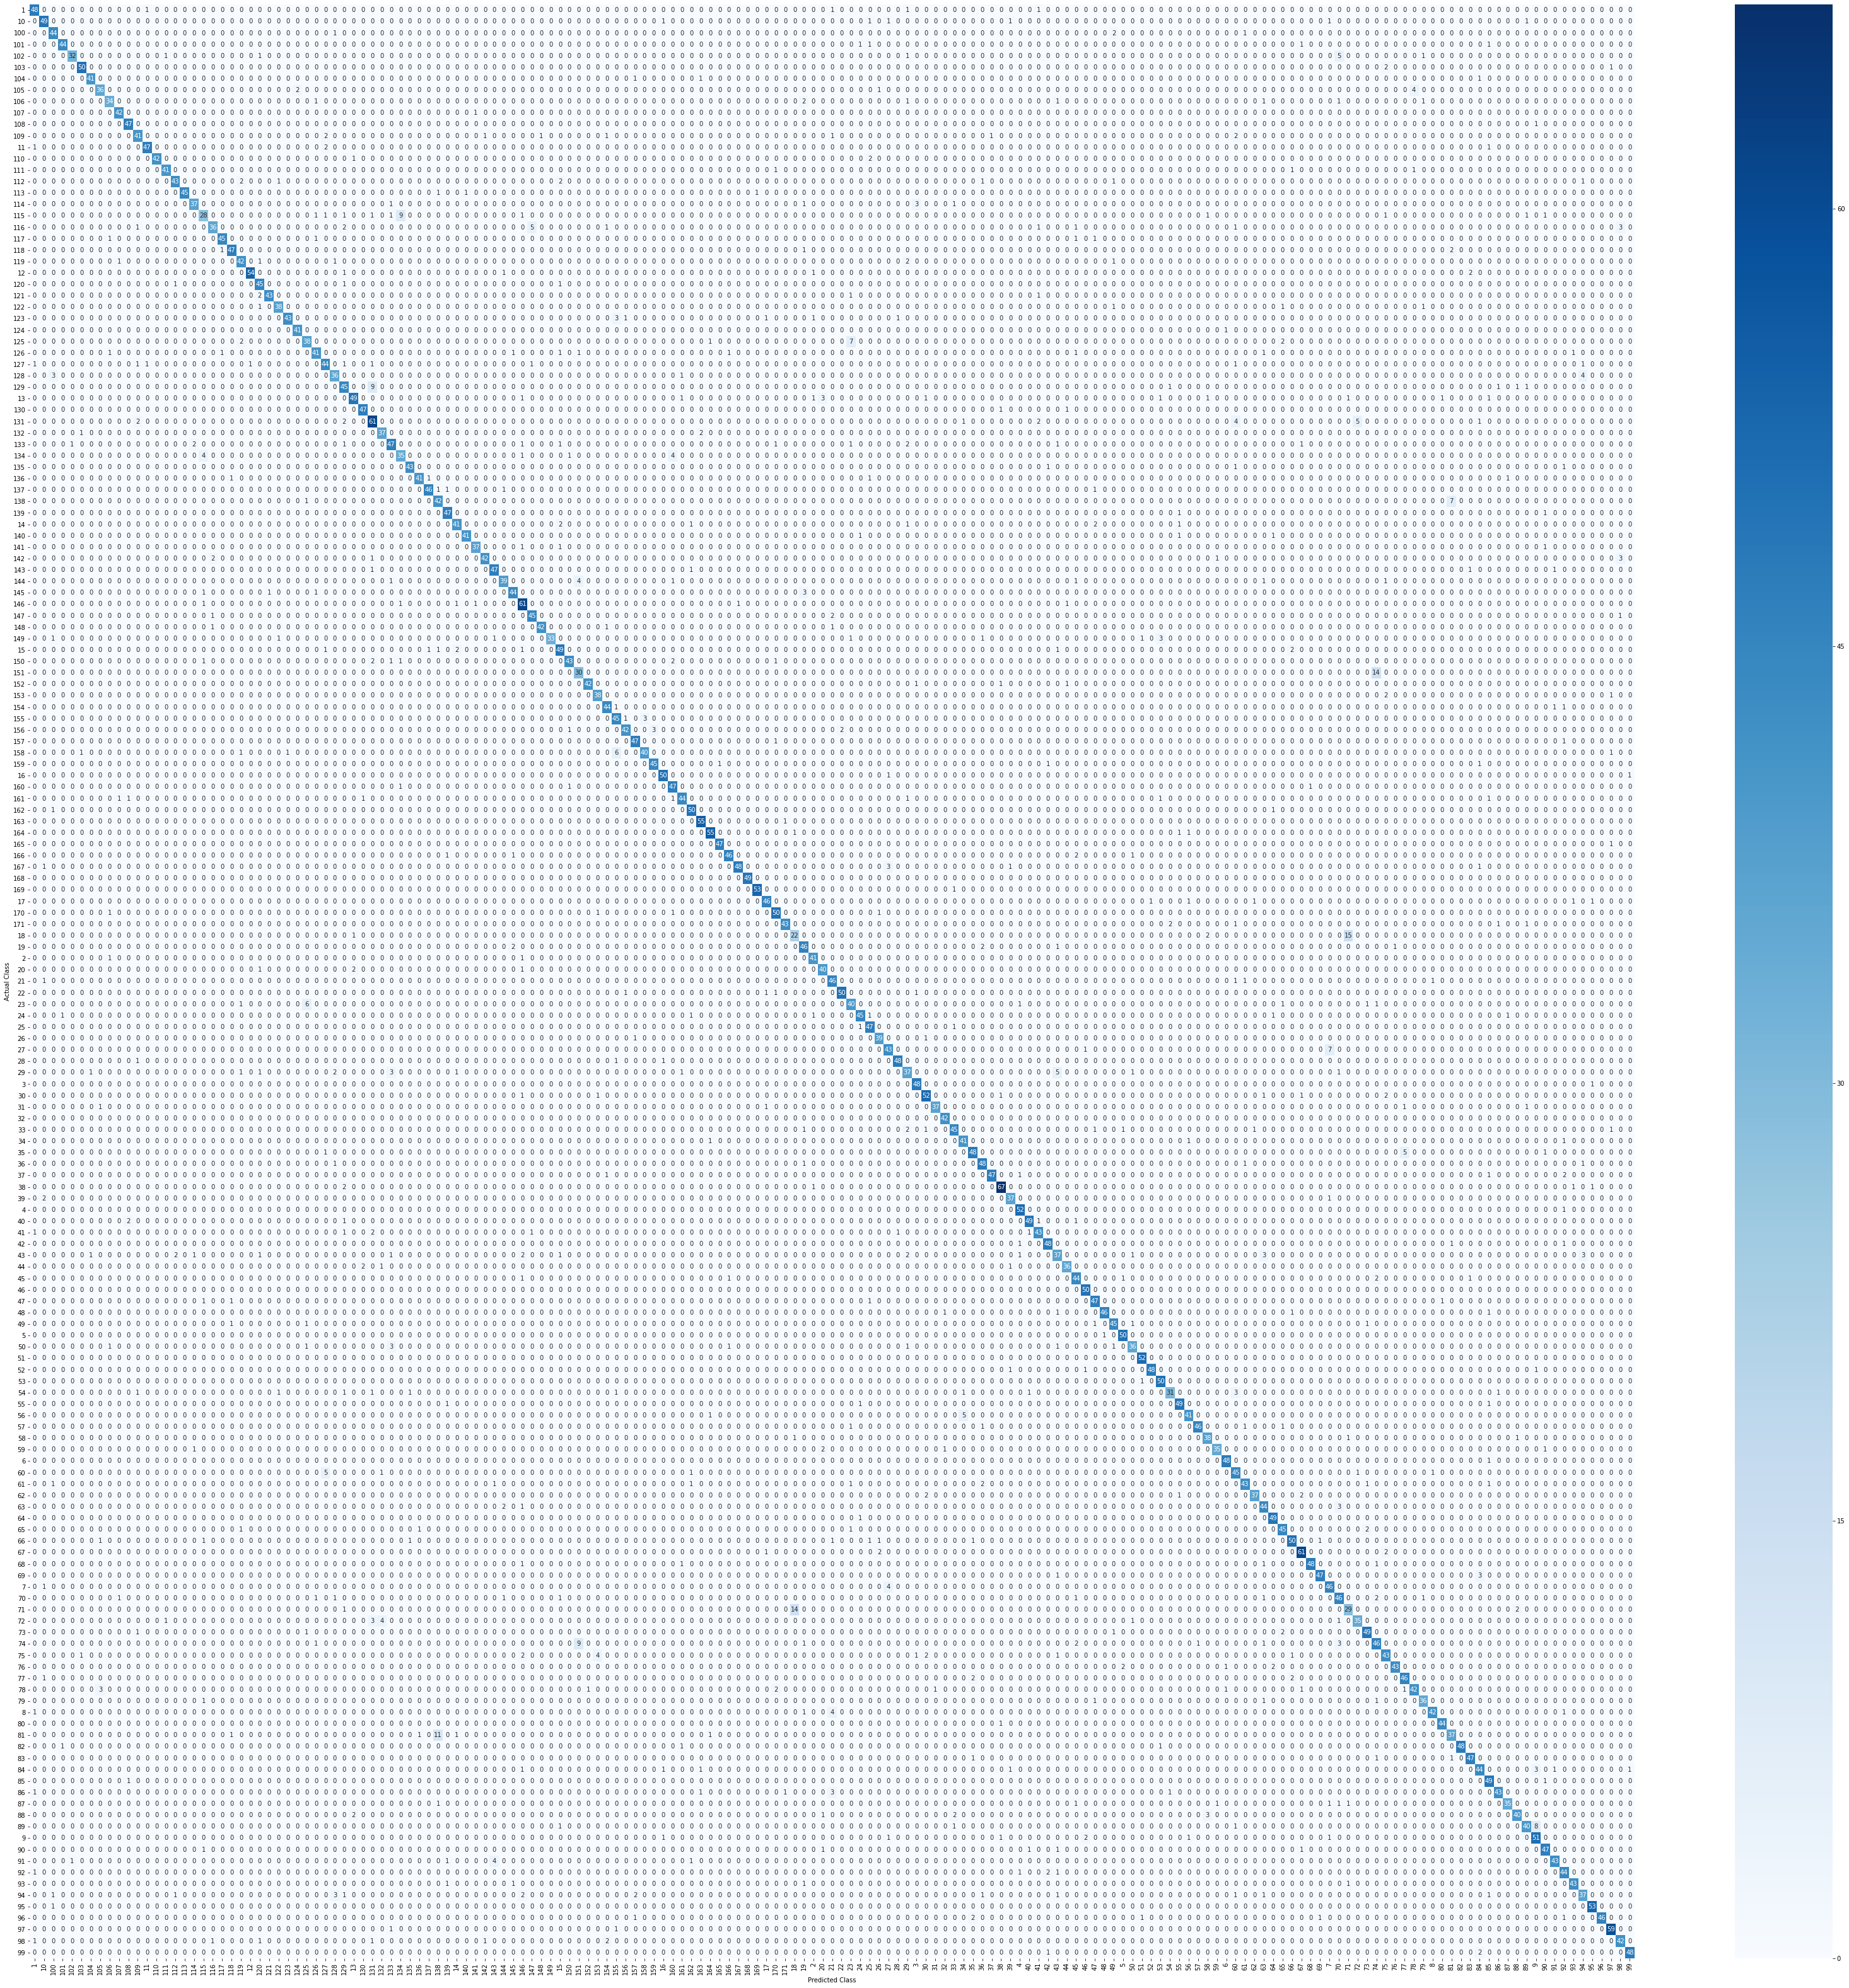

In [2]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 30
epochs2 = 150
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [3]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.8883272464898275
recall_score   :  0.8845157799225506
f1_score       :  0.8851539825350753
accuracy_score :  0.8841549295774648

Best accuracy  :  0.8852112889289856


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 228s 212ms/step - loss: 0.3395 - accuracy: 0.9302 - val_loss: 0.7685 - val_accuracy: 0.8022 - lr: 1.0000e-07
Epoch 2/150
1076/1076 [==============================] - 224s 208ms/step - loss: 0.3254 - accuracy: 0.9353 - val_loss: 0.7624 - val_accuracy: 0.8036 - lr: 1.0000e-07
Epoch 3/150
1076/1076 [==============================] - 228s 212ms/step - loss: 0.3211 - accuracy: 0.9352 - val_loss: 0.7590 - val_accuracy: 0.8042 - lr: 1.0000e-07
Epoch 4/150
1076/1076 [==============================] - 226s 210ms/step - loss: 0.3133 - accuracy: 0.9383 - val_loss: 0.7554 - val_accuracy: 0.8067 - lr: 1.0000e-07
Epoch 5/150
1076/1076 [==============================] - 224s 208ms/step - loss: 0.3119 - accuracy: 0.9402 - val_loss: 0.7530 - val_accuracy: 0.8043 - lr: 1.0000e-07
Epoch 6/150
1076/1076 [==============================] - 220s 204ms/step - loss: 0.3089 - accuracy: 0.9386 - val_loss: 0.7234 - val_accuracy: 0.8075 - lr: 5.0000e-06
Epoch 7/150
1076

1076/1076 [==============================] - 227s 211ms/step - loss: 0.0121 - accuracy: 0.9994 - val_loss: 0.4694 - val_accuracy: 0.8769 - lr: 5.0000e-06
Epoch 100/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.0112 - accuracy: 0.9996 - val_loss: 0.4822 - val_accuracy: 0.8761 - lr: 5.0000e-06
Epoch 101/150
1076/1076 [==============================] - 228s 212ms/step - loss: 0.0107 - accuracy: 0.9997 - val_loss: 0.4656 - val_accuracy: 0.8761 - lr: 5.0000e-06
Epoch 102/150
1076/1076 [==============================] - 228s 212ms/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.4731 - val_accuracy: 0.8768 - lr: 5.0000e-06
Epoch 103/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.0107 - accuracy: 0.9993 - val_loss: 0.4775 - val_accuracy: 0.8757 - lr: 5.0000e-06
Epoch 104/150
1076/1076 [==============================] - 228s 212ms/step - loss: 0.0105 - accuracy: 0.9994 - val_loss: 0.4766 - val_accuracy: 0.8781 - lr: 5.0000e-06
Epoch 

Epoch 148/150
1076/1076 [==============================] - 228s 212ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.4471 - val_accuracy: 0.8878 - lr: 1.0000e-06
Epoch 149/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4478 - val_accuracy: 0.8901 - lr: 1.0000e-06
Epoch 150/150
1076/1076 [==============================] - 228s 212ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4519 - val_accuracy: 0.8883 - lr: 1.0000e-06


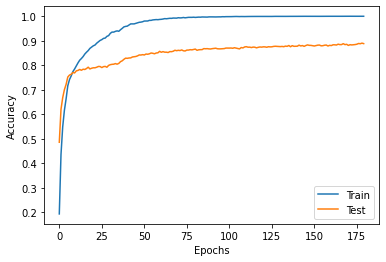

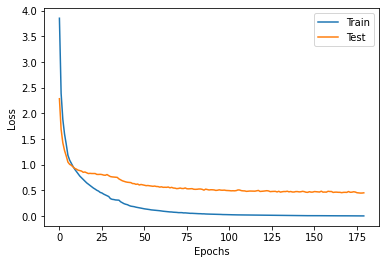

Text(0.5, 492.0, 'Predicted Class')

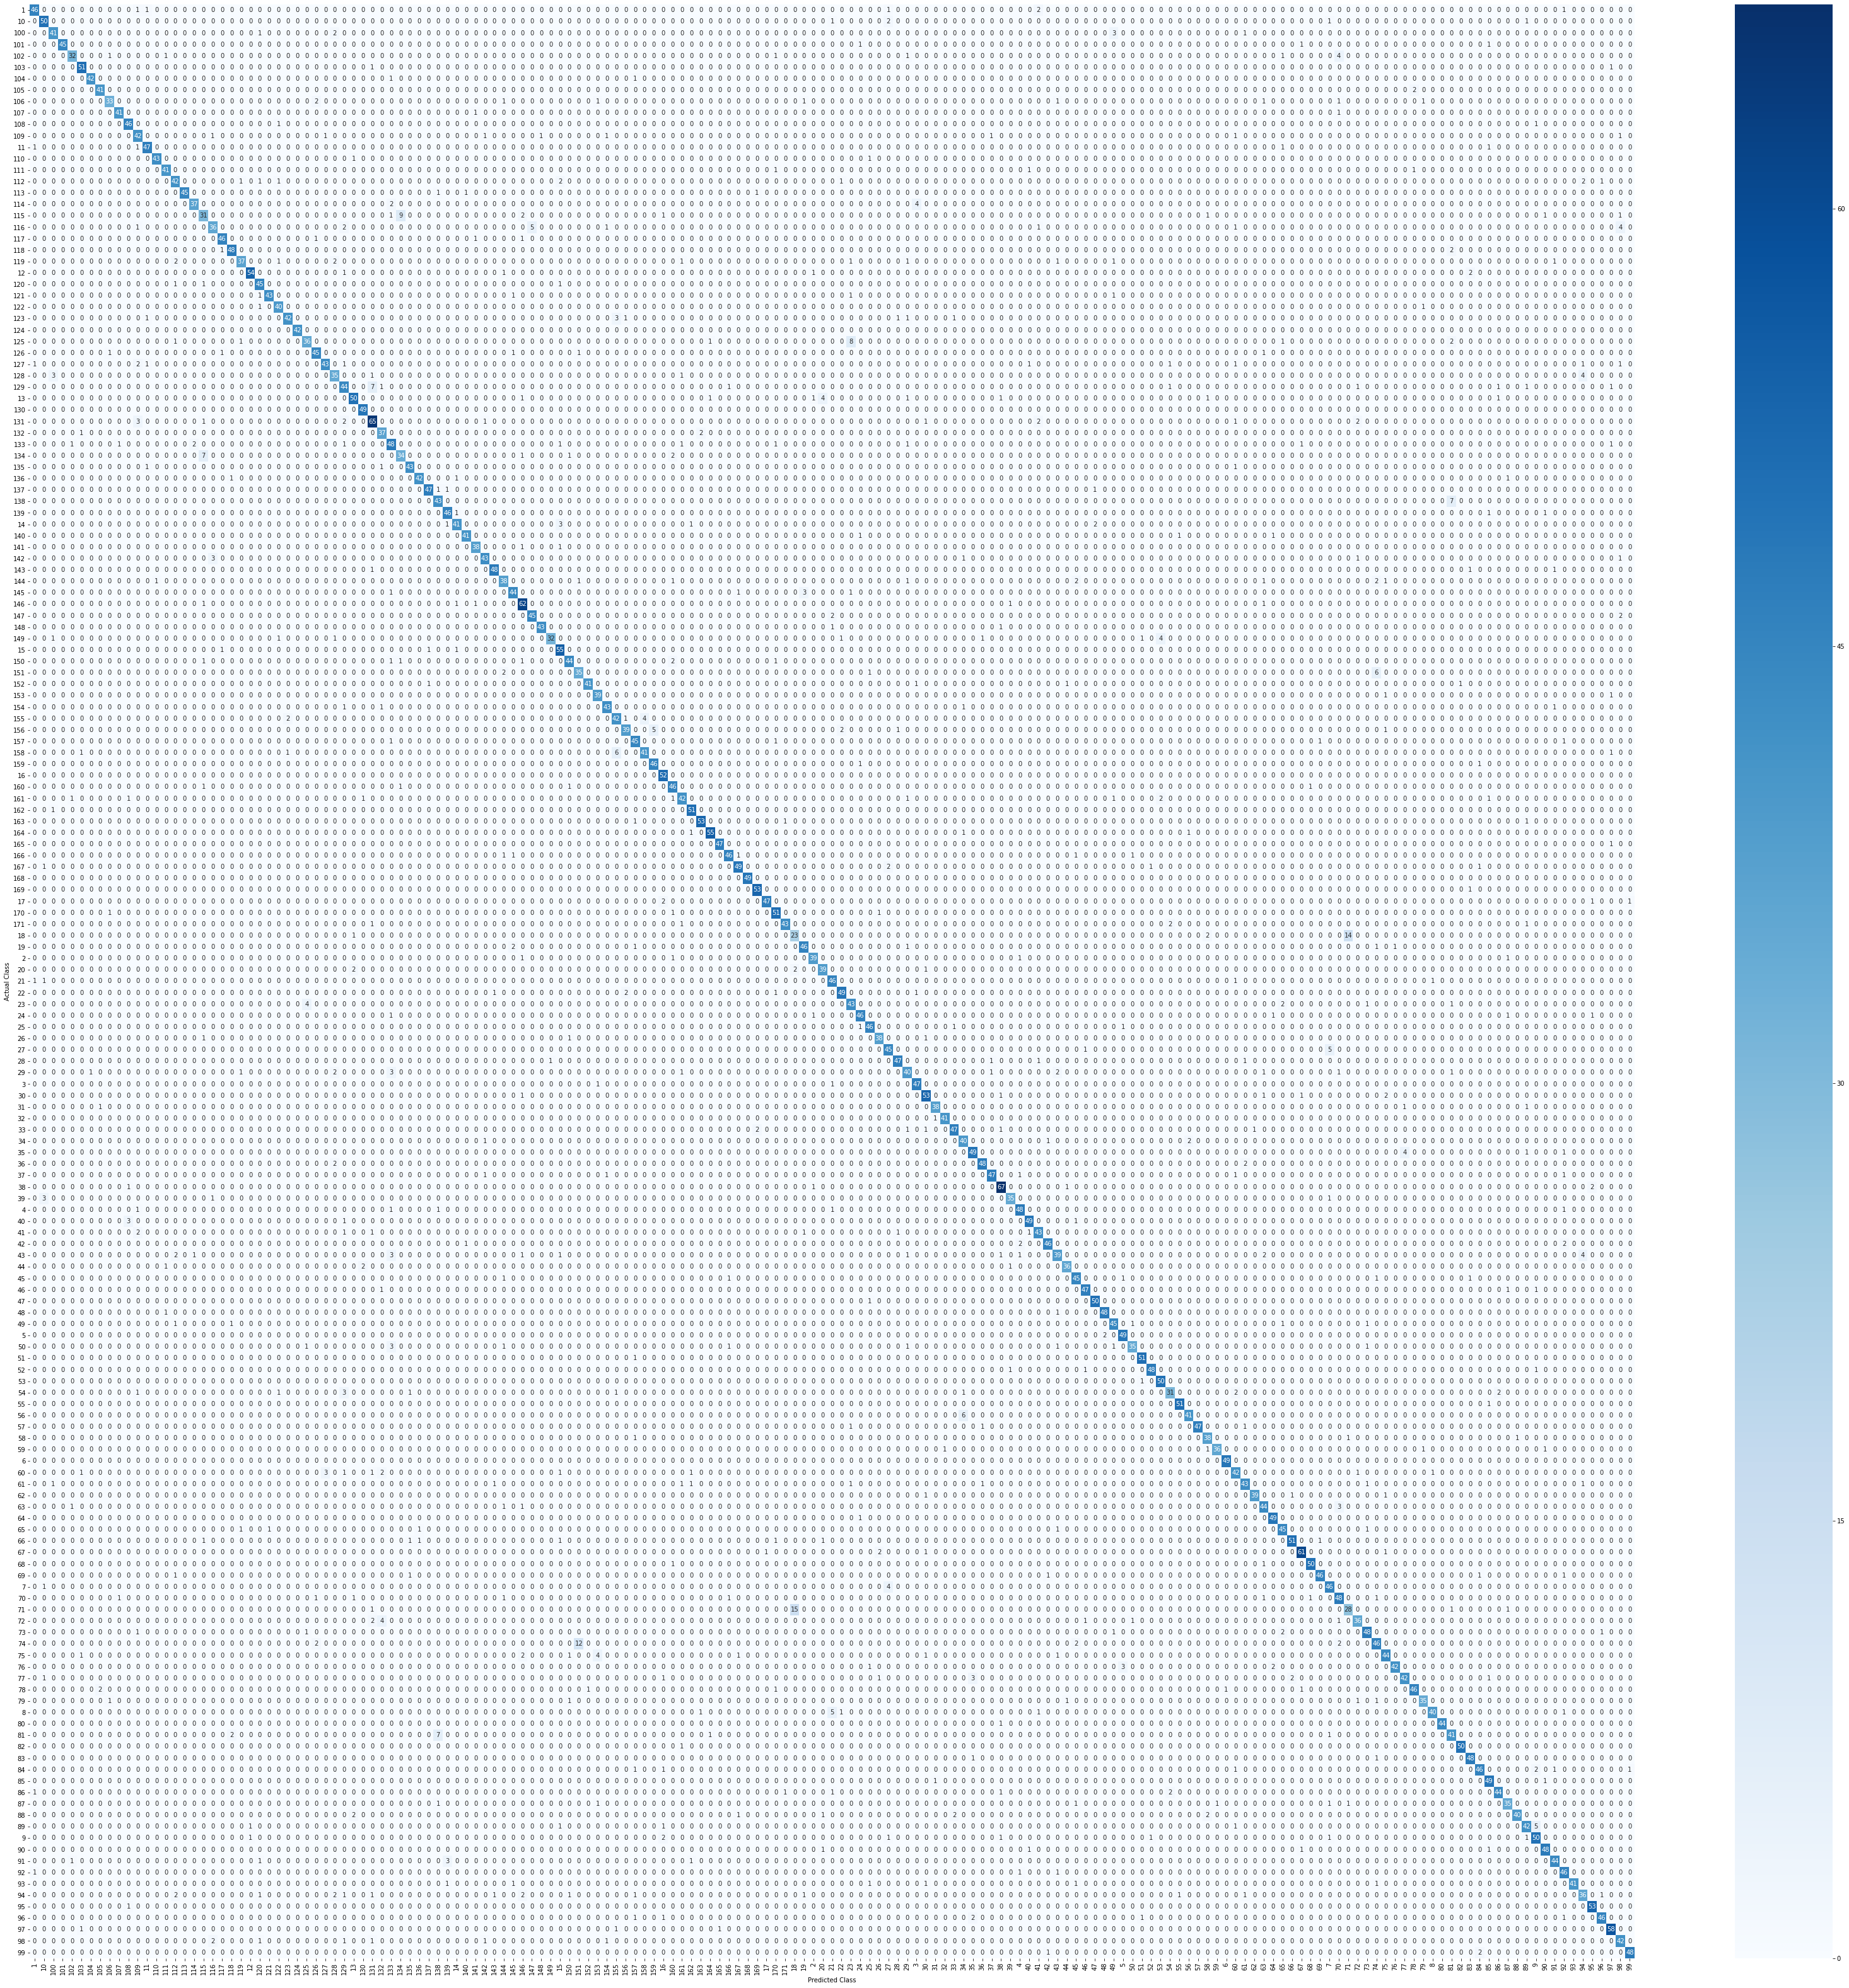

In [3]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 30
epochs2 = 150
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [4]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.8913560747990981
recall_score   :  0.8882663188252984
f1_score       :  0.8886673229597611
accuracy_score :  0.888262910798122

Best accuracy  :  0.8901408314704895


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 235s 218ms/step - loss: 0.3478 - accuracy: 0.9292 - val_loss: 0.7806 - val_accuracy: 0.8005 - lr: 1.0000e-07
Epoch 2/150
1076/1076 [==============================] - 229s 213ms/step - loss: 0.3340 - accuracy: 0.9326 - val_loss: 0.7740 - val_accuracy: 0.8014 - lr: 1.0000e-07
Epoch 3/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.3244 - accuracy: 0.9354 - val_loss: 0.7685 - val_accuracy: 0.8023 - lr: 1.0000e-07
Epoch 4/150
1076/1076 [==============================] - 226s 210ms/step - loss: 0.3123 - accuracy: 0.9389 - val_loss: 0.7661 - val_accuracy: 0.8042 - lr: 1.0000e-07
Epoch 5/150
1076/1076 [==============================] - 224s 208ms/step - loss: 0.3138 - accuracy: 0.9393 - val_loss: 0.7624 - val_accuracy: 0.8045 - lr: 1.0000e-07
Epoch 6/150
1076/1076 [==============================] - 224s 208ms/step - loss: 0.3049 - accuracy: 0.9412 - val_loss: 0.7357 - val_accuracy: 0.8094 - lr: 5.0000e-06
Epoch 7/150
1076

1076/1076 [==============================] - 229s 213ms/step - loss: 0.0117 - accuracy: 0.9994 - val_loss: 0.4770 - val_accuracy: 0.8772 - lr: 5.0000e-06
Epoch 100/150
1076/1076 [==============================] - 230s 213ms/step - loss: 0.0117 - accuracy: 0.9994 - val_loss: 0.4734 - val_accuracy: 0.8781 - lr: 5.0000e-06
Epoch 101/150
1076/1076 [==============================] - 232s 215ms/step - loss: 0.0104 - accuracy: 0.9997 - val_loss: 0.4775 - val_accuracy: 0.8783 - lr: 5.0000e-06
Epoch 102/150
1076/1076 [==============================] - 238s 221ms/step - loss: 0.0107 - accuracy: 0.9995 - val_loss: 0.4765 - val_accuracy: 0.8806 - lr: 5.0000e-06
Epoch 103/150
1076/1076 [==============================] - 239s 222ms/step - loss: 0.0102 - accuracy: 0.9995 - val_loss: 0.4852 - val_accuracy: 0.8778 - lr: 5.0000e-06
Epoch 104/150
1076/1076 [==============================] - 236s 220ms/step - loss: 0.0102 - accuracy: 0.9997 - val_loss: 0.4690 - val_accuracy: 0.8793 - lr: 5.0000e-06
Epoch 

Epoch 148/150
1076/1076 [==============================] - 240s 223ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.4507 - val_accuracy: 0.8858 - lr: 1.0000e-06
Epoch 149/150
1076/1076 [==============================] - 239s 222ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4518 - val_accuracy: 0.8879 - lr: 1.0000e-06
Epoch 150/150
1076/1076 [==============================] - 236s 219ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4462 - val_accuracy: 0.8879 - lr: 1.0000e-06


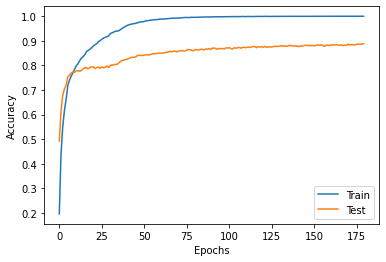

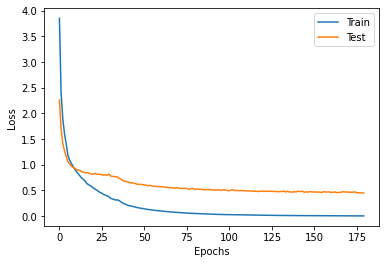

Text(0.5, 492.0, 'Predicted Class')

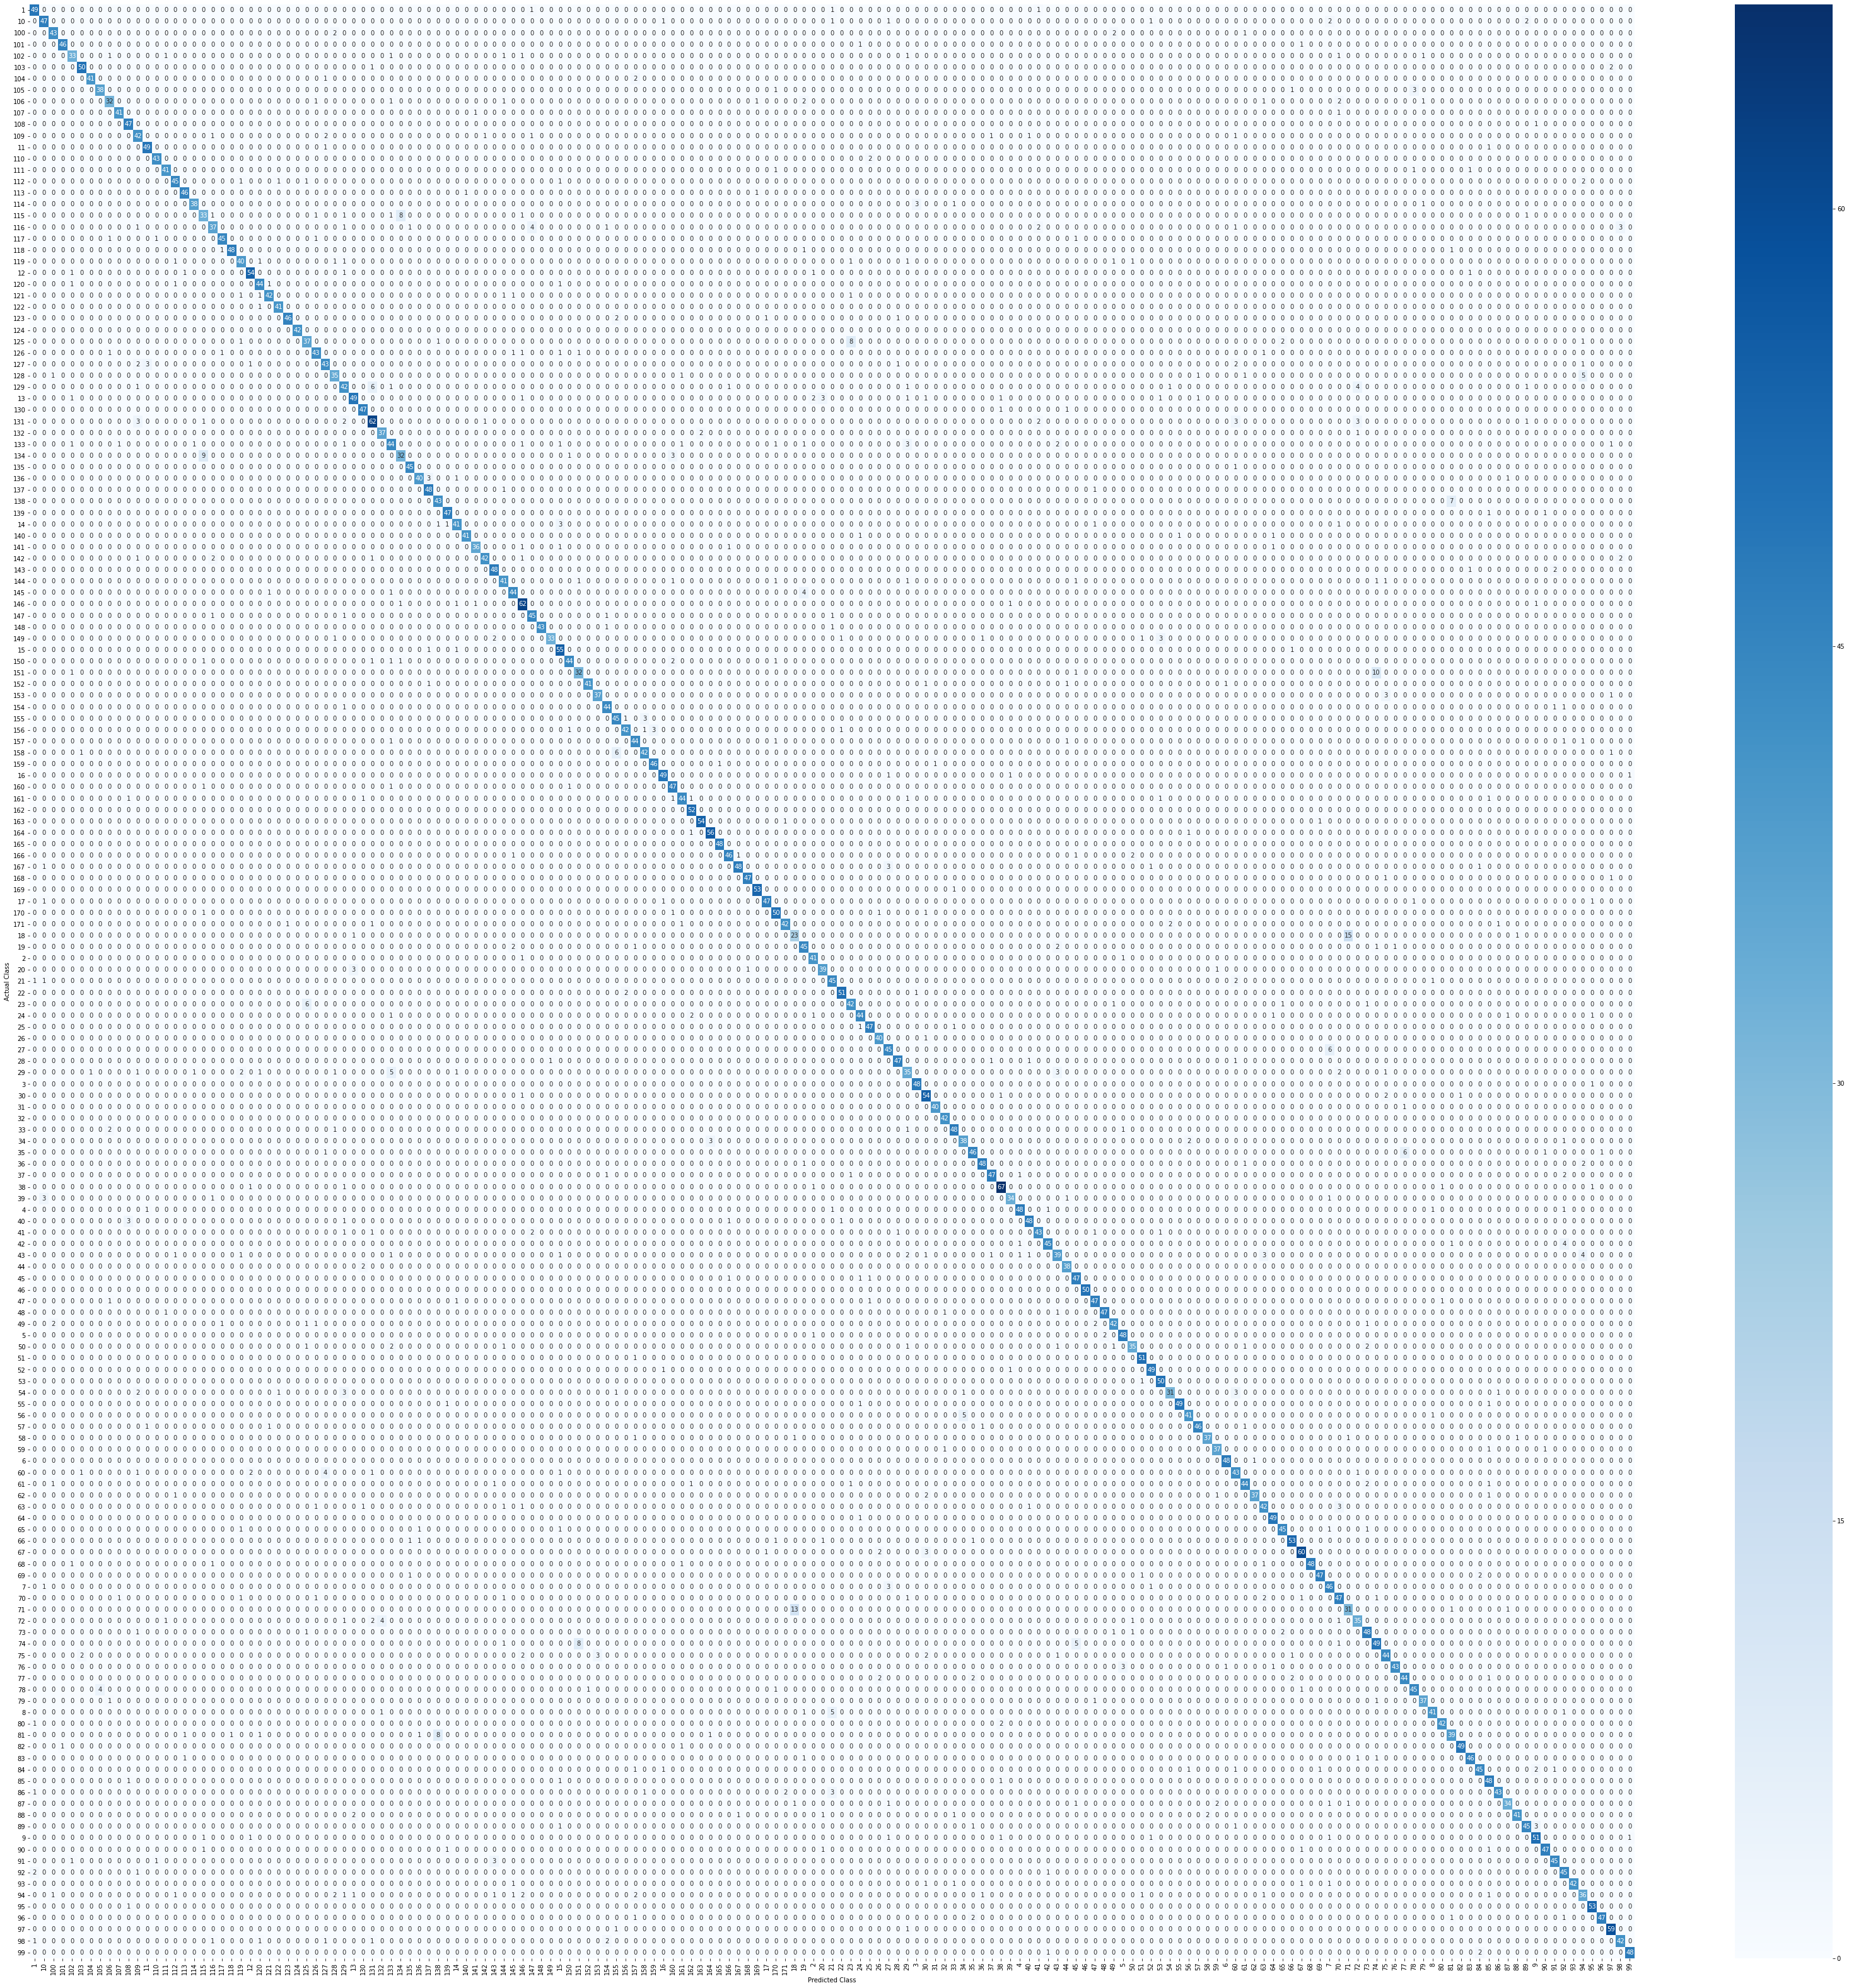

In [5]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 30
epochs2 = 150
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [6]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.891098374804747
recall_score   :  0.8881847846746399
f1_score       :  0.8887027735196454
accuracy_score :  0.8879107981220657

Best accuracy  :  0.887910783290863


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)        

1076/1076 [==============================] - 232s 216ms/step - loss: 0.3313 - accuracy: 0.9348 - val_loss: 0.7662 - val_accuracy: 0.8015 - lr: 1.0000e-07
Epoch 2/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.3180 - accuracy: 0.9384 - val_loss: 0.7615 - val_accuracy: 0.8034 - lr: 1.0000e-07
Epoch 3/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.3170 - accuracy: 0.9385 - val_loss: 0.7565 - val_accuracy: 0.8042 - lr: 1.0000e-07
Epoch 4/150
1076/1076 [==============================] - 227s 211ms/step - loss: 0.3123 - accuracy: 0.9393 - val_loss: 0.7524 - val_accuracy: 0.8058 - lr: 1.0000e-07
Epoch 5/150
1076/1076 [==============================] - 230s 214ms/step - loss: 0.3068 - accuracy: 0.9417 - val_loss: 0.7496 - val_accuracy: 0.8060 - lr: 1.0000e-07
Epoch 6/150
1076/1076 [==============================] - 234s 217ms/step - loss: 0.3000 - accuracy: 0.9400 - val_loss: 0.7299 - val_accuracy: 0.8083 - lr: 5.0000e-06
Epoch 7/150
1076

1076/1076 [==============================] - 237s 220ms/step - loss: 0.0108 - accuracy: 0.9996 - val_loss: 0.4817 - val_accuracy: 0.8766 - lr: 5.0000e-06
Epoch 100/150
1076/1076 [==============================] - 237s 221ms/step - loss: 0.0113 - accuracy: 0.9992 - val_loss: 0.4676 - val_accuracy: 0.8792 - lr: 5.0000e-06
Epoch 101/150
1076/1076 [==============================] - 230s 214ms/step - loss: 0.0101 - accuracy: 0.9997 - val_loss: 0.4812 - val_accuracy: 0.8770 - lr: 5.0000e-06
Epoch 102/150
1076/1076 [==============================] - 232s 215ms/step - loss: 0.0099 - accuracy: 0.9997 - val_loss: 0.4721 - val_accuracy: 0.8786 - lr: 5.0000e-06
Epoch 103/150
1076/1076 [==============================] - 233s 217ms/step - loss: 0.0100 - accuracy: 0.9994 - val_loss: 0.4765 - val_accuracy: 0.8797 - lr: 5.0000e-06
Epoch 104/150
1076/1076 [==============================] - 234s 217ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.4725 - val_accuracy: 0.8798 - lr: 5.0000e-06
Epoch 

Epoch 148/150
1076/1076 [==============================] - 232s 215ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.4506 - val_accuracy: 0.8878 - lr: 1.0000e-06
Epoch 149/150
1076/1076 [==============================] - 233s 216ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4528 - val_accuracy: 0.8867 - lr: 1.0000e-06
Epoch 150/150
1076/1076 [==============================] - 233s 216ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.4493 - val_accuracy: 0.8881 - lr: 1.0000e-06


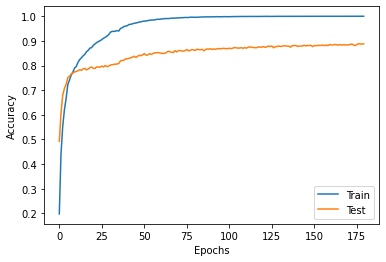

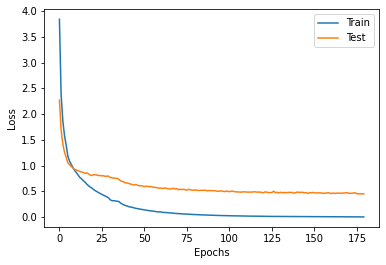

Text(0.5, 492.0, 'Predicted Class')

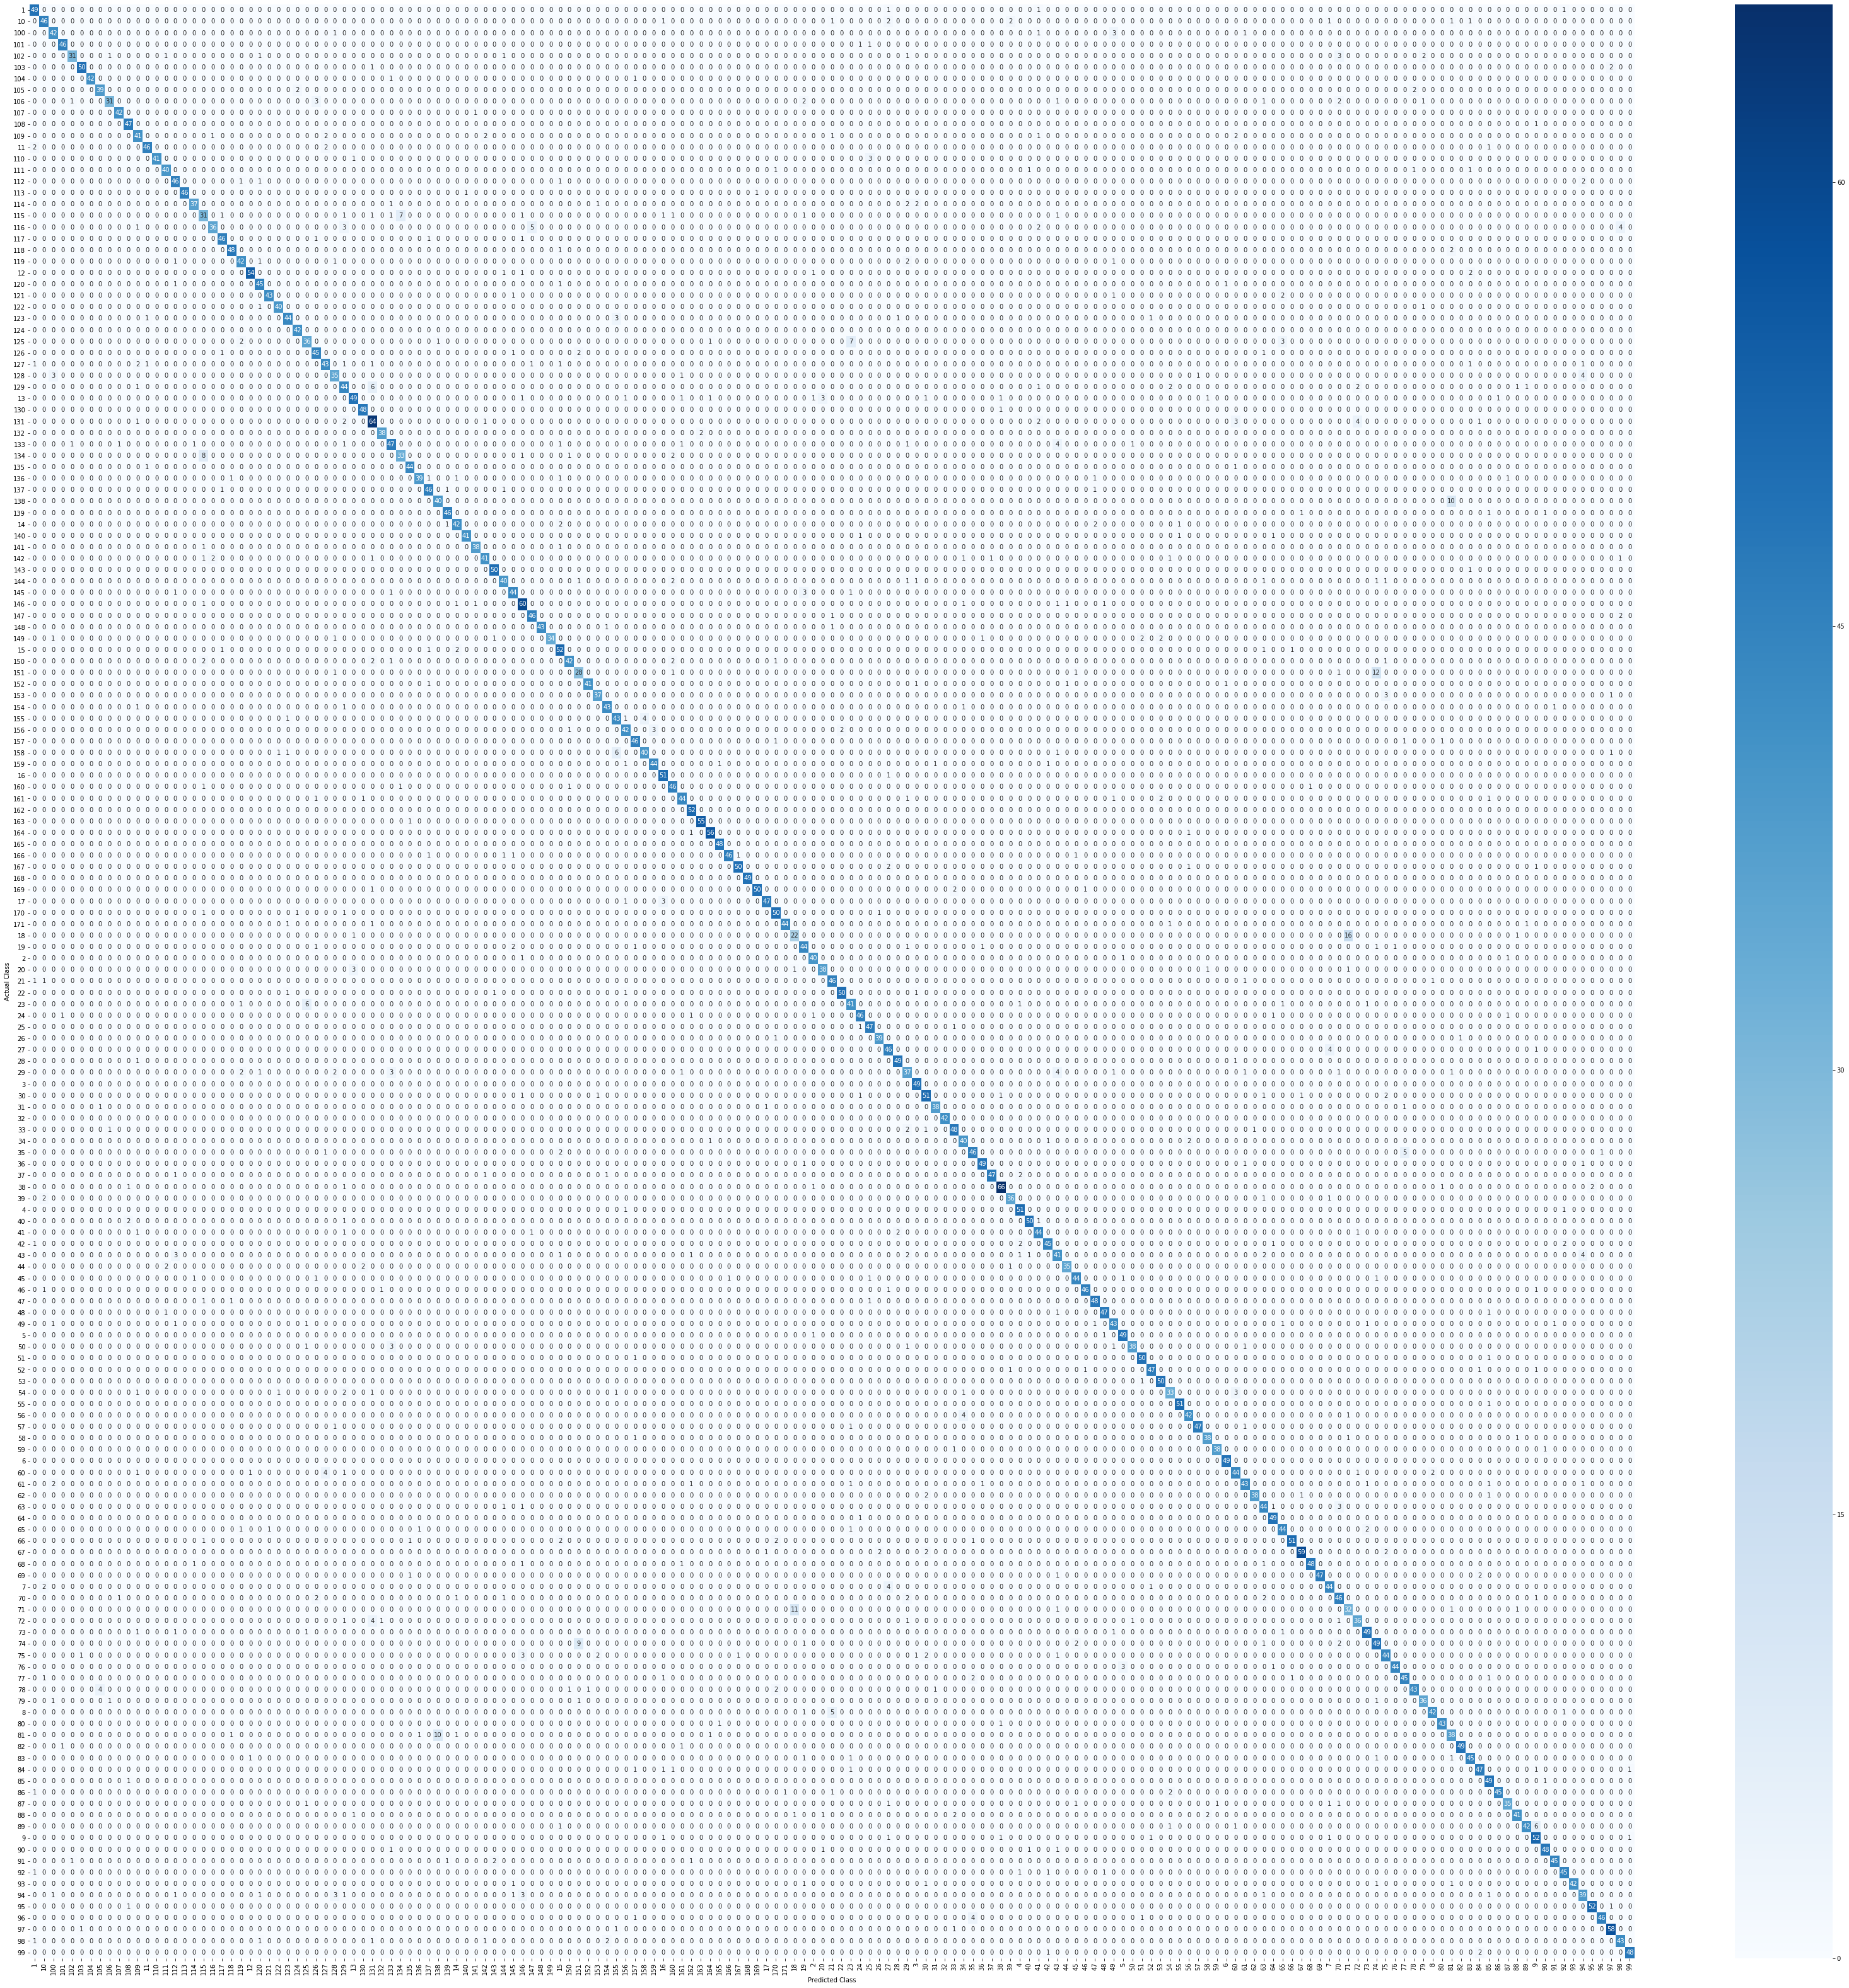

In [7]:
# HCR-Net (fine tuned network)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization as BatchNorm

# pre-trained models
from keras.applications.vgg16 import VGG16

# custom learning rates
import learning_rate as lr

# set the seeds for reproduceability (which is not certain in case of
# of multiple CPUs and GPU).
np.random.seed(1)
tf.random.set_seed(1)

# change following for each dataset (dataset details and learning params)
# dataset details
train_data_dir = './Data/Offline/CMATERdb3.1.3.3/Train/'
validation_data_dir = './Data/Offline/CMATERdb3.1.3.3/Test/'
nb_train_samples = 34439
nb_validation_samples = 8520
num_classes = 171

# learning params
epochs1 = 30
epochs2 = 150
learning_rate1 = lr.decayed_learning_rate
learning_rate2 = lr.decayed_learning_rate_tuned150

batch_size = 32
# dimensions of our images.
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)

# using VGG16: load model without classifier layer, and using weights from ImageNet
source_model = VGG16(include_top=False, input_shape=input_shape)

# create model
model = Sequential()

# add lower layers of VGG16 to our model, and mark as not trainable
for layer in source_model.layers[:-6]:
    layer.trainable = False
    model.add(layer)

# add extra layers at top of lower layers of pre-trained model
model.add(BatchNorm())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNorm())
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# using ImageDataGenerator to load and scale data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True,
    seed=13)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_validation_samples,
    color_mode="rgb",
    shuffle=False,
    class_mode='categorical')

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate1)

history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs1,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)


# fine tuning the model by unfreezing the lower layers (used from VGG16)
for layer in model.layers[:12]:
    layer.trainable = True

# reset the image generators
train_generator.reset()
validation_generator.reset()

# recompile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
print(model.summary())

# define callback for custom learning rate
callback = tf.keras.callbacks.LearningRateScheduler(learning_rate2)

history2 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs2,
    callbacks=[callback],
    validation_data=validation_generator,
    validation_steps=1)

# save model
# model.save_weights('HCR-Net.h5')

# plot the convergence, in terms of accuracy and loss, of HCR-Net
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
# plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# evaluate model and plot confusion matrix
# filenames = validation_generator.filenames
predict = model.predict(validation_generator)
y_pred = np.argmax(predict,axis=-1)
cf_matrix = confusion_matrix(validation_generator.classes,y_pred)

# calculate size of confusion matrix figure, and plot it
fig, ax = plt.subplots(figsize=(math.ceil(num_classes/3.0), math.ceil(num_classes/3.0)))
labels = list(validation_generator.class_indices.keys())
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='', cmap='Blues')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [8]:
print('precision_score: ', precision_score(validation_generator.classes,y_pred, average="macro"))
print('recall_score   : ', recall_score(validation_generator.classes,y_pred, average="macro"))
print('f1_score       : ', f1_score(validation_generator.classes,y_pred, average="macro"))
print('accuracy_score : ', accuracy_score(validation_generator.classes,y_pred, normalize=True))

print("\nBest accuracy  : ", max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])))

precision_score:  0.8923991620776762
recall_score   :  0.8884366933874787
f1_score       :  0.889342290278689
accuracy_score :  0.8881455399061032

Best accuracy  :  0.8883802890777588
